Command lines:

python3.6 test.py --env <env name> --eval_type model
    
for i in {0..4}; do for env in "Walker2d-v2" "Humanoid-v2" "Swimmer-v2" "HalfCheetah-v2" "Ant-v2" ; do python3.6 main.py --alpha 0 --updates_per_step 10 --seed $i --env-name $env; done; done

In [1]:
import pickle
import os

from scipy.signal import medfilt
from matplotlib import pyplot as pl
import matplotlib as mpl
import numpy as np

In [69]:
def plot_model(results, title):
    x = np.linspace(0.8, 1.2, 20) 
    
    colors = ['#396ab1', '#da7c30', '#3e9651', '#cc2529', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    facecolors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#ccc210', '#808585']

    f, axarr = pl.subplots(1, 1, figsize=(3, 3))
    
    idx = 0
    for key in results:
        if key not in ['results_model']:
            avg = []
            std = []
            for mass in results[key]:
                avg.append(np.mean(results[key][mass]))
                std.append(np.std(results[key][mass]) / np.sqrt(len(results[key][mass]) - 1) * 2)
                if mass > 1.0 and mass < 1.03:
                    print(np.mean(results[key][mass]))
            pl.plot(x, avg, label=key, color=colors[idx])
            pl.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=facecolors[idx], alpha=0.2, interpolate=True)
            idx += 1
#     leg = pl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3, fontsize=10)
#     for legobj in leg.legendHandles:
#         legobj.set_linewidth(3.0)
    pl.legend()
    pl.title(title)
      
    pl.xlabel('Relative mass')
    pl.ylabel('Reward')
    axarr.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    pl.show()
#             print(str(key) + ' & ' + str(int(100 * x[avg.index(min(avg))])) + '\% & '+ str(int(min(avg))) + ' & ' + str(int(100 * x[avg.index(max(avg))])) + '\% & ' + str(int(max(avg))) + ' & ' + str(int(np.mean(np.mean(results[key][1.0])))) + '\\\\')
            
#     colors = ['#396ab1', '#da7c30', '#3e9651', '#cc2529', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
#     facecolors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#ccc210', '#808585']
    
#     keys = ['non_robust', 'robust_0.1']#, 'robust_0.01', 'robust_0.05', 'robust_0.15', 'robust_0.2']
#     labels = ['non robust', r'$\alpha = 0.1$']#, r'$\alpha = 0.01$', r'$\alpha = 0.05$', r'$\alpha = 0.15$', r'$\alpha = 0.2$']
#     for i, key in enumerate(keys):
#         avg = []
#         std = []
#         for mass in results[key]:
#             avg.append(np.mean(results[key][mass]))
#             std.append(np.std(results[key][mass]) / np.sqrt(len(results[key][mass]) - 1) * 2)
#         pl.plot([a * 100 for a in x], avg, label=labels[i], color=colors[i])
#         pl.fill_between([a * 100 for a in x], np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=facecolors[i], alpha=0.2, interpolate=True)
    
#     pl.suptitle('Robustness to mass uncertainty', fontsize=20)
#     leg = pl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=6, fontsize=15)
#     for legobj in leg.legendHandles:
#         legobj.set_linewidth(3.0)
#     # pl.legend()
#     pl.xlabel('Relative Mass [%]')
#     pl.ylabel('Reward')
#     pl.show()

In [3]:
def plot_env(env_name, params, names, title):
#     base_dir = os.getcwd() + '/models/' + env_name
    base_dir = os.getcwd() + '/models/' + env_name

    results = {} 
    for idx, param in enumerate(params):
        try:
            with open(base_dir + '/' + param + '/results_model', 'rb') as f:
                results[names[idx]] = pickle.load(f)
        except:
            pass

    plot_model(results, title)

In [106]:
def plot_2d(env_name, params, names, title):
    base_dir = os.getcwd() + '/models/' + env_name

    results = {}
    vmin = 2000
    vmax = -2000
    for idx, param in enumerate(params):
        try:
            with open(base_dir + '/' + param + '/results_model_noise', 'rb') as f:
                data = pickle.load(f)

                mat = np.zeros((10, 10))
                row = 0
                for key in data:
                    col = 0
                    for key2 in data[key]:
                        mat[row, col] = np.mean(data[key][key2])
                        col += 1
                    row += 1
                results[names[idx]] = mat

                vmin = min(vmin, np.min(mat))
                vmax = max(vmax, np.max(mat))
        except:
            pass

    for key in results:
        
        pl.imshow(results[key], cmap='autumn', interpolation='nearest', vmin=vmin, vmax=vmax)
        x = [0,2,4,6,8]
        labels = [0, 0.04, 0.07, 0.1, 0.15]
        pl.xticks(x, labels, fontsize=14)

        y = [0,2,4,6,8]
        labels = [0.8, 0.88, 0.97, 1.06, 1.15]
        pl.yticks(y, labels, fontsize=14)

        pl.xlabel('Noise Probability', fontsize=18)
        pl.ylabel('Relative Mass', fontsize=18)
        pl.title(key, fontsize=22)

        pl.colorbar()

        pl.show()
        print(key)
        print(np.mean(results[key]))
        print(np.max(results[key]))
        print(np.min(results[key]))

In [5]:
def plot_env_curves(env_name, params, names, title):
    base_dir = os.getcwd() + '/models/' + env_name

    results = {}
    for idx, param in enumerate(params):
        try:
            result = []
            for n in range(5):
                with open(base_dir + '/' + param + '/' + str(n) + '/' + '/results', 'rb') as f:
                    data = pickle.load(f)
                    if len(data['train_rewards']) == 0:
                        result.append(data['eval_rewards'])
                    else:
                        result.append(data['train_rewards'])
            results[names[idx]] = np.array(result)
        except:
            pass
    plot_learning_curves(results, title)

In [6]:
def plot_learning_curves(results, title):
    colors = ['#396ab1', '#da7c30', '#3e9651', '#cc2529', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    facecolors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#ccc210', '#808585']

    f, axarr = pl.subplots(1, 1, figsize=(3, 3))
    
    idx = 0
    for key in results:
        if key not in ['results_model']:
            x = np.linspace(0, 1000, results[key].shape[1])
            avg = np.mean(results[key][:,:,1], axis=0)
            std = np.std(results[key][:,:,1], axis=0) / (np.sqrt(results[key].shape[0] - 1) * 2)
            pl.plot(x, avg, label=key, color=colors[idx])
            pl.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=facecolors[idx], alpha=0.2, interpolate=True)
            idx += 1
            
    pl.legend()
    pl.title(title)
      
    pl.xlabel('Relative mass')
    pl.ylabel('Reward')
    axarr.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    pl.show()

# Exploration Ablation

baseline - exploration ablation


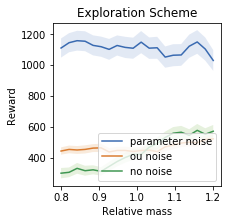

In [10]:
print('baseline - exploration ablation')
params = ['param_noise/non_robust', 'ou_noise/non_robust', 'no_noise/non_robust']
names = ['parameter noise', 'ou noise', 'no noise']
plot_env('Hopper-v2', params, names, 'Exploration Scheme')

nr-mdp - exploration ablation
1147.710416710119
1146.113766582128
823.6984996499774
1306.1254966672127


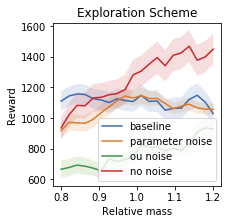

In [101]:
print('nr-mdp - exploration ablation')
params = ['param_noise/non_robust', 'param_noise/nr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_10', 'no_noise/nr_mdp_0.1_10']
names = ['baseline', 'parameter noise', 'ou noise', 'no noise']
plot_env('Hopper-v2', params, names, 'Exploration Scheme')

pr-mdp - exploration ablation


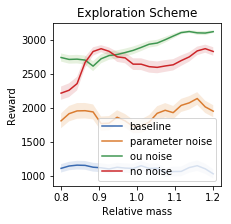

In [9]:
print('pr-mdp - exploration ablation')
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/pr_mdp_0.1_10', 'no_noise/pr_mdp_0.1_10']
names = ['baseline', 'parameter noise', 'ou noise', 'no noise']
plot_env('Hopper-v2', params, names, 'Exploration Scheme')

# Alpha Values

nr-mdp - alpha values


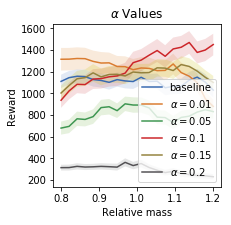

In [38]:
print('nr-mdp - alpha values')
params = ['param_noise/non_robust', 'no_noise/nr_mdp_0.01_10', 'no_noise/nr_mdp_0.05_10', 'no_noise/nr_mdp_0.1_10', 'no_noise/nr_mdp_0.15_10', 'no_noise/nr_mdp_0.2_10']
names = ['baseline', r"$\alpha=0.01$", r"$\alpha=0.05$", r"$\alpha=0.1$", r"$\alpha=0.15$", r"$\alpha=0.2$"]
plot_env('Hopper-v2', params, names, r"$\alpha$ Values")

pr-mdp - alpha values


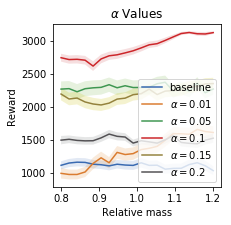

In [39]:
print('pr-mdp - alpha values')
params = ['param_noise/non_robust', 'ou_noise/pr_mdp_0.01_10', 'ou_noise/pr_mdp_0.05_10', 'ou_noise/pr_mdp_0.1_10', 'ou_noise/pr_mdp_0.15_10', 'ou_noise/pr_mdp_0.2_10']
names = ['baseline', r"$\alpha=0.01$", r"$\alpha=0.05$", r"$\alpha=0.1$", r"$\alpha=0.15$", r"$\alpha=0.2$"]
plot_env('Hopper-v2', params, names, r"$\alpha$ Values")

# Actor:Adversary Ratio

nr-mdp - ratio regular


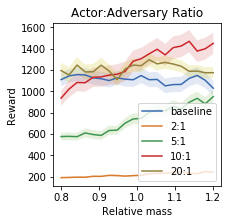

In [40]:
print('nr-mdp - ratio regular')
params = ['param_noise/non_robust', 'no_noise/nr_mdp_0.1_2', 'no_noise/nr_mdp_0.1_5', 'no_noise/nr_mdp_0.1_10', 'no_noise/nr_mdp_0.1_20']
names = ['baseline', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, 'Actor:Adversary Ratio')

pr-mdp - ration regular


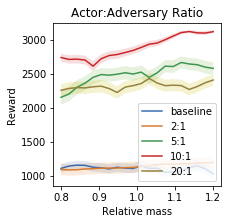

In [41]:
print('pr-mdp - ration regular')
params = ['param_noise/non_robust', 'ou_noise/pr_mdp_0.1_2', 'ou_noise/pr_mdp_0.1_5', 'ou_noise/pr_mdp_0.1_10', 'ou_noise/pr_mdp_0.1_20']
names = ['baseline', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, 'Actor:Adversary Ratio')

## Flipped Ratio

nr-mdp - ratio flipped


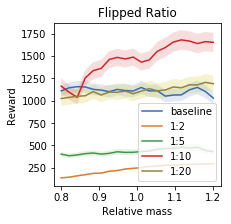

In [42]:
print('nr-mdp - ratio flipped')
params = ['param_noise/non_robust', 'no_noise/flip_ratio_nr_mdp_0.1_2', 'no_noise/flip_ratio_nr_mdp_0.1_5', 'no_noise/flip_ratio_nr_mdp_0.1_10', 'no_noise/flip_ratio_nr_mdp_0.1_20']
names = ['baseline', '1:2', '1:5', '1:10', '1:20']
plot_env('Hopper-v2', params, names, 'Flipped Ratio')

pr-mdp - ration flipped


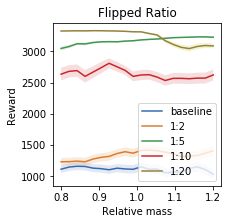

In [43]:
print('pr-mdp - ration flipped')
params = ['param_noise/non_robust', 'ou_noise/flip_ratio_pr_mdp_0.1_2', 'ou_noise/flip_ratio_pr_mdp_0.1_5', 'ou_noise/flip_ratio_pr_mdp_0.1_10', 'ou_noise/flip_ratio_pr_mdp_0.1_20']
names = ['baseline', '1:2', '1:5', '1:10', '1:20']
plot_env('Hopper-v2', params, names, 'Flipped Ratio')

# Operator vs Exploration

nr-mdp - exploration vs operator
1147.710416710119
1471.5647568408872
1240.0594383305026


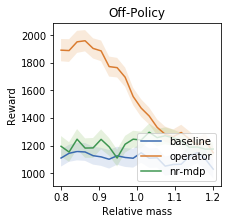

In [104]:
print('nr-mdp - exploration vs operator')
# params = ['param_noise/non_robust', 'param_noise/alternative_nr_mdp_0.1_20', 'no_noise/alternative_non_robust_nr_mdp_0.1_20', 'no_noise/nr_mdp_0.1_20']
# names = ['baseline', 'operator', 'exploration', 'nr-mdp']
params = ['param_noise/non_robust', 'param_noise/alternative_nr_mdp_0.1_20', 'no_noise/nr_mdp_0.1_20']
names = ['baseline', 'operator', 'nr-mdp']
plot_env('Hopper-v2', params, names, 'Off-Policy')

pr-mdp - exploration vs operator
1147.710416710119
1398.3483401915128
2887.8860410325583


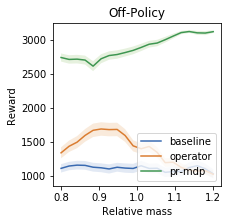

In [105]:
print('pr-mdp - exploration vs operator')
# params = ['param_noise/non_robust', 'param_noise/alternative_pr_mdp_0.1_10', 'ou_noise/alternative_non_robust_pr_mdp_0.1_10', 'ou_noise/pr_mdp_0.1_10']
# names = ['baseline', 'operator', 'exploration', 'pr-mdp']
params = ['param_noise/non_robust', 'param_noise/alternative_pr_mdp_0.1_10', 'ou_noise/pr_mdp_0.1_10']
names = ['baseline', 'operator', 'pr-mdp']
plot_env('Hopper-v2', params, names, 'Off-Policy')

# 2D Heatmaps

Hopper-v2


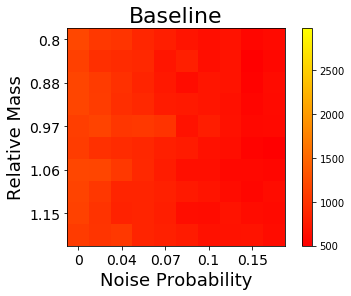

Baseline
803.5196861925375
1187.6963689856698
496.79785883546504


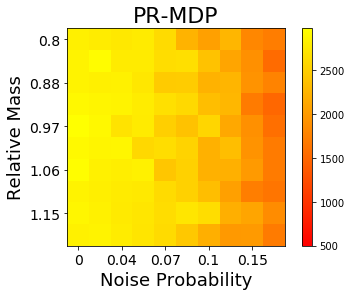

PR-MDP
2448.218672654466
2980.4760888568003
1502.9418001926167


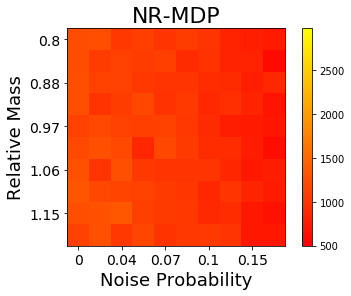

NR-MDP
1010.2430281464591
1342.806185706583
594.9464525763377
Walker2d-v2


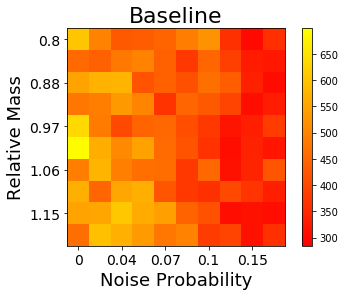

Baseline
441.8456186220928
692.477174429571
299.465840282773


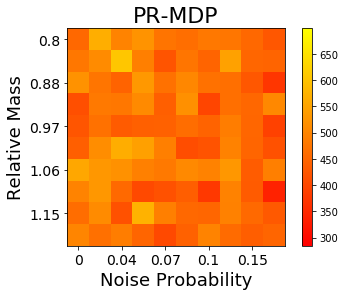

PR-MDP
469.440024211616
605.2950410993119
339.589766229768


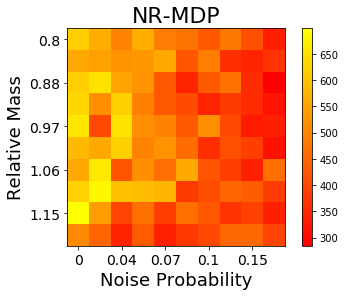

NR-MDP
467.0976496064384
698.4884971332154
284.31831375871684
Humanoid-v2


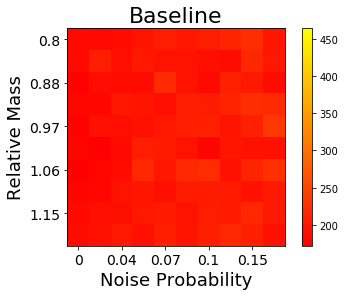

Baseline
197.35080321884627
234.81208986366653
171.96630391771666


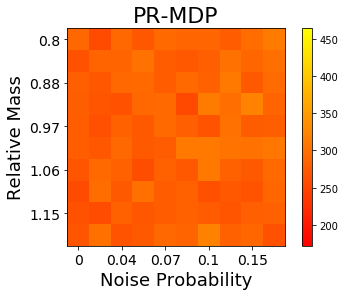

PR-MDP
283.9883542977393
320.64955237155823
256.1623651608404


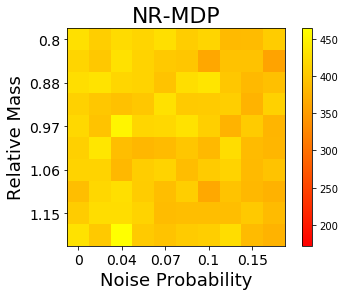

NR-MDP
403.60838837648805
463.99828822676676
359.30453819032454
Swimmer-v2
Ant-v2


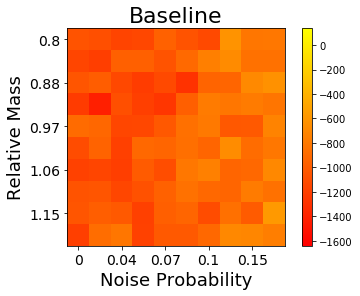

Baseline
-967.6610421138721
-575.7836232066718
-1424.0012265142357


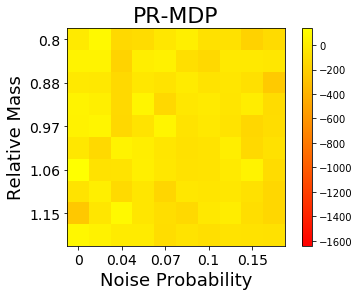

PR-MDP
-46.90236431523961
137.5398037108874
-244.98293104011267


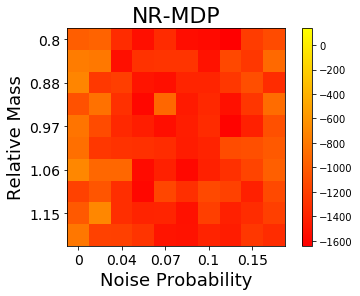

NR-MDP
-1249.7382875346223
-698.1424318453986
-1641.7849241543097
HalfCheetah-v2


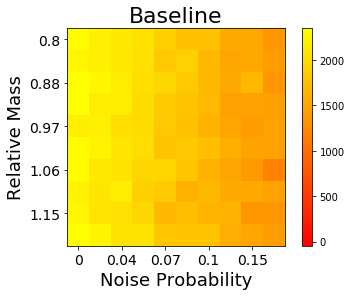

Baseline
1837.1714940236666
2349.25424667944
1187.1647930270635


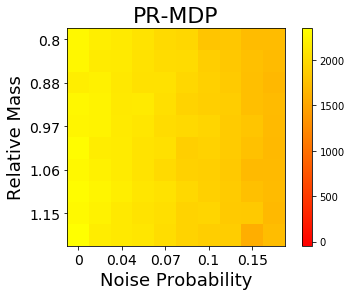

PR-MDP
1992.3836013418484
2342.0612867644177
1585.0695996351265


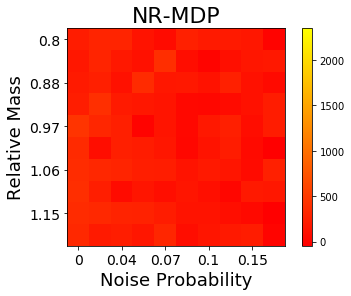

NR-MDP
179.09725646920492
442.27148769103115
-46.00208379033554
InvertedPendulum-v2


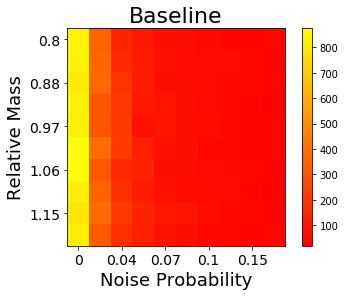

Baseline
178.4194
875.38
23.04


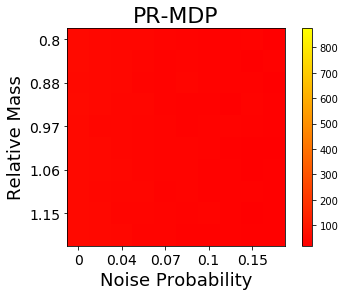

PR-MDP
33.599399999999996
52.58
18.22


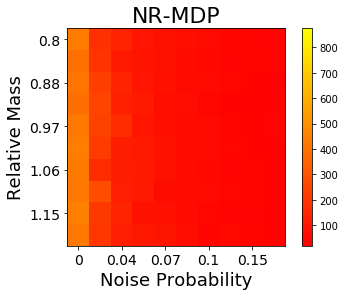

NR-MDP
114.37519999999999
449.92
24.26


In [107]:
params = ['param_noise/non_robust', 'ou_noise/pr_mdp_0.1_10', 'no_noise/nr_mdp_0.1_20']
for env_name in ['Hopper-v2', 'Walker2d-v2', 'Humanoid-v2', 'Swimmer-v2', 'Ant-v2', 'HalfCheetah-v2', 'InvertedPendulum-v2']:
    print(env_name)
    plot_2d(env_name, params, ['Baseline', 'PR-MDP', 'NR-MDP'], env_name)

Hopper-v2
1147.710416710119
2887.8860410325583
1240.0594383305026


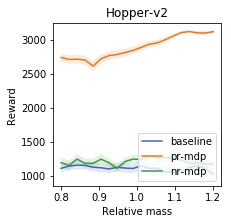

Walker2d-v2
550.0886353382929
527.2433573699957
610.4339112105355


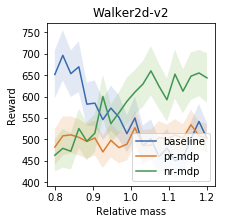

Humanoid-v2
179.18652028487205
269.5178729847316
412.18714672717044


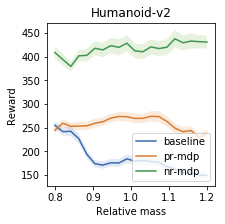

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Swimmer-v2


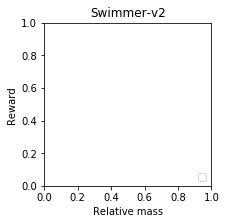

Ant-v2
-1174.2982531341586
-34.151521057564366


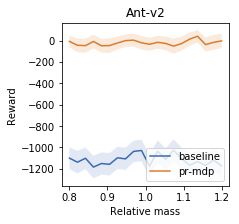

HalfCheetah-v2
2299.436600066963
2321.192389112152
251.7712218212511


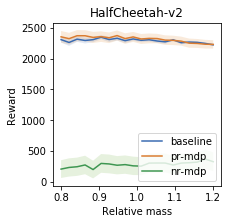

InvertedPendulum-v2
821.876
50.028
423.47


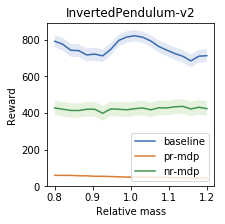

In [76]:
params = ['param_noise/non_robust', 'ou_noise/pr_mdp_0.1_10', 'no_noise/nr_mdp_0.1_20']
names = ['baseline', 'pr-mdp', 'nr-mdp']
for env_name in ['Hopper-v2', 'Walker2d-v2', 'Humanoid-v2', 'Swimmer-v2', 'Ant-v2', 'HalfCheetah-v2', 'InvertedPendulum-v2']:
    print(env_name)
    plot_env(env_name, params, names, env_name)